In [108]:
import pandas as pd
import numpy as np

from datetime import datetime

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

In [109]:
mpl.rcParams['figure.figsize'] = (16, 9)
pd.set_option('display.max_rows', 500)
sns.set(style = "darkgrid")

In [110]:
df_plot = pd.read_csv('../data/processed/Covid_flat_table.csv', sep = ';')

In [111]:
df_plot.head()

,date,Italy,US,Canada,Spain,India,United Kingdom
0,2020-01-22,0,1,0,0,0,0
1,2020-01-23,0,1,0,0,0,0
2,2020-01-24,0,2,0,0,0,0
3,2020-01-25,0,2,0,0,0,0
4,2020-01-26,0,5,1,0,0,0


<Figure size 1152x648 with 0 Axes>

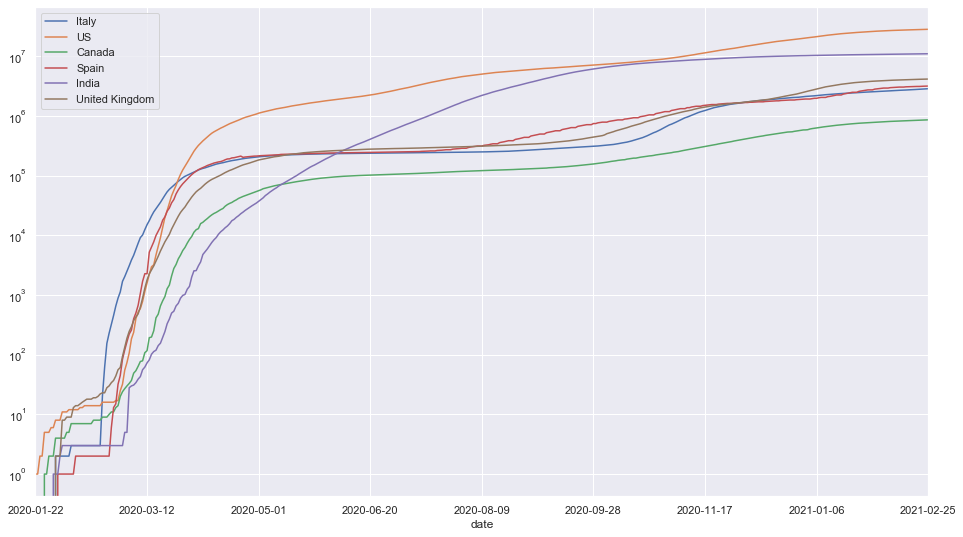

In [112]:
plt.figure()
ax = df_plot.set_index('date').plot()
ax.set_yscale('log')

## Plotly

In [113]:
import plotly.graph_objects as go
import dash
import dash_core_components as dcc
import dash_html_components as html

In [114]:
country_list = df_plot[1:].columns

In [118]:
fig = go.Figure()
for each in country_list:
    
    fig.add_trace(go.Scatter(
        x = df_plot.date, 
        y = df_plot[each], 
        mode = 'markers+lines', 
        name = each,
        line_width = 2,
        marker_size = 4,
        opacity = 0.9
    ))
    

fig.update_layout(
    xaxis_title = 'Time',
    yaxis_title = "Confirmed infected people (source johns hopkins, log-scale)"
)

fig.update_yaxes(type = 'log')
fig.update_layout(xaxis_rangeslider_visible = True)
fig.show(renderer = 'chrome')

In [119]:
option_list = []
for each in country_list:
    label_dict = {}
    label_dict['label'] = each
    label_dict['value'] = each
    option_list.append(label_dict)

In [131]:
app = dash.Dash()
app.layout = html.Div([
    html.Label('Multi-Select Country'),
    dcc.Dropdown(
        id = 'country_drop_down',
        options = option_list,
        value = ['Canada', 'India'],
        multi = True
    ),
    
    dcc.Graph(figure = fig, id = 'main_window_slope')
])

In [132]:
from dash.dependencies import Input, Output

@app.callback(
    Output('main_window_slope', 'figure'),
    [Input('country_drop_down', 'value')]
)

def update_figure(country_list):
    traces = []
    for each in country_list:
        traces.append(dict(
        x = df_plot.date, 
        y = df_plot[each], 
        mode = 'markers+lines', 
        name = each,
        line_width = 2,
        marker_size = 4,
        opacity = 0.9
    ))
    return {
        'data': traces,
        'layout': dict(
            width = 1280,
            height = 720,
            xaxis_title = "Time",
            yaxis_title = "Confirmed infected people (source johns hopkins, log-scale)",           
        )
    }
    

In [133]:
app.run_server(debug = True, use_reloader = False)

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
